In [310]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

import plotly
import plotly.offline as pyo
import plotly.graph_objs as go


In [311]:
!dir

 O volume na unidade D � DATA
 O N�mero de S�rie do Volume � 681E-0D62

 Pasta de d:\Dropbox\GitHub\bootcamp_dsa_2021\src\notebooks

18/01/2021  11:59    <DIR>          .
18/01/2021  11:59    <DIR>          ..
18/01/2021  17:37           174.388 analise_covid.ipynb
18/01/2021  18:29         3.574.352 deaths_by_totalCases.html
18/01/2021  18:29         3.574.782 deaths_per_100k_inhabitants.html
18/01/2021  18:29         3.505.322 lineplot.html
18/01/2021  15:07            10.694 modelos_epidemiologicos.ipynb
18/01/2021  18:29         3.554.653 newDeaths.html
18/01/2021  18:29         3.592.374 newDeaths_100k.html
18/01/2021  18:57           631.744 new_notebook.ipynb
18/01/2021  18:29         3.587.062 testes_caso_confirmado.html
18/01/2021  18:29         3.576.068 tests_per_100k_inhabitants.html
              10 arquivo(s)     25.781.439 bytes
               2 pasta(s)   1.046.174.523.392 bytes dispon�veis


In [312]:

# dealing with local dataset
# df = pd.read_csv('../../data/cases-brazil-cities-time.csv.gz', compression='gzip', sep=',')
# df.head()

df_woca = pd.read_csv('../../data/cases-brazil-states.csv')
df_woca['date'] = pd.to_datetime(df_woca['date'])
df_woca['pop'] = ( df_woca['deaths'] / df_woca['deaths_per_100k_inhabitants'] )*100000 # pop em 100k hab
df_woca['newDeaths_100k'] = df_woca['newDeaths']/( df_woca['pop'] / 100000 ) # 

print(df_woca.info())
print(df_woca.shape)
df_woca.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8694 entries, 0 to 8693
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   epi_week                         8694 non-null   int64         
 1   date                             8694 non-null   datetime64[ns]
 2   country                          8694 non-null   object        
 3   state                            8694 non-null   object        
 4   city                             8694 non-null   object        
 5   newDeaths                        8694 non-null   int64         
 6   deaths                           8694 non-null   int64         
 7   newCases                         8694 non-null   int64         
 8   totalCases                       8694 non-null   int64         
 9   deathsMS                         8694 non-null   int64         
 10  totalCasesMS                     8694 non-null   int64      

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants,pop,newDeaths_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00047,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00047,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [313]:
for state in df_woca['state'].unique():
    df_woca.loc[df_woca.query(f'state == "{state}" ').index , 'pop'] = df_woca.query(f'state == "{state}" ')['pop'].dropna().mean()

In [314]:

# dealing with local dataset
# df = pd.read_csv('../../data/cases-brazil-cities-time.csv.gz', compression='gzip', sep=',')
# df.head()

df_brio = pd.read_csv('../../data/caso_full.csv.gz')
df_brio['date'] = pd.to_datetime(df_brio['date'])

print(df_brio.info())
print(df_brio.shape)
df_brio.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410687 entries, 0 to 1410686
Data columns (total 18 columns):
 #   Column                                         Non-Null Count    Dtype         
---  ------                                         --------------    -----         
 0   city                                           1402313 non-null  object        
 1   city_ibge_code                                 1405306 non-null  float64       
 2   date                                           1410687 non-null  datetime64[ns]
 3   epidemiological_week                           1410687 non-null  int64         
 4   estimated_population                           1405306 non-null  float64       
 5   estimated_population_2019                      1405306 non-null  float64       
 6   is_last                                        1410687 non-null  bool          
 7   is_repeated                                    1410687 non-null  bool          
 8   last_available_confirmed        

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-25,0.0,0,1,city,SP,1,0
1,NaN,35.0,2020-02-25,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-25,0.0,0,1,state,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-26,0.0,0,2,city,SP,0,0
3,NaN,35.0,2020-02-26,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-26,0.0,0,2,state,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-27,0.0,0,3,city,SP,0,0


In [315]:

# dealing with local dataset
# df = pd.read_csv('../../data/cases-brazil-cities-time.csv.gz', compression='gzip', sep=',')
# df.head()

df_gov = pd.read_csv('../../data/HIST_PAINEL_COVIDBR_12jan2021.csv', sep=';')
df_gov['data'] = pd.to_datetime(df_gov['data'])

print(df_gov.info())
print(df_gov.shape)
df_gov.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1641617 entries, 0 to 1641616
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   regiao                  1641617 non-null  object        
 1   estado                  1641293 non-null  object        
 2   municipio               1626440 non-null  object        
 3   coduf                   1641617 non-null  int64         
 4   codmun                  1632572 non-null  float64       
 5   codRegiaoSaude          1626440 non-null  float64       
 6   nomeRegiaoSaude         1626440 non-null  object        
 7   data                    1641617 non-null  datetime64[ns]
 8   semanaEpi               1641617 non-null  int64         
 9   populacaoTCU2019        1635485 non-null  float64       
 10  casosAcumulado          1641617 non-null  int64         
 11  casosNovos              1641617 non-null  int64         
 12  obitosAcumulad

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN


In [316]:
df_woca['state'].unique()

array(['SP', 'TOTAL', 'RJ', 'BA', 'ES', 'DF', 'AL', 'MG', 'RS', 'GO',
       'PE', 'PR', 'RN', 'SC', 'AM', 'MS', 'SE', 'CE', 'AC', 'PA', 'PB',
       'TO', 'PI', 'AP', 'MA', 'MT', 'RO', 'RR'], dtype=object)

In [317]:
df_woca['testes_caso_confirmado'] = df_woca['tests']/df_woca['totalCases']

In [318]:
def get_plotly_lineplot_trace_object(x, y, name=''):
    # marker_dict = dict(size=12,
    #                 color ='rgb(51,204,153)',
    #                 symbol='pentagon',
    #                 line={'width':2}
                #   )
    # trace
    trace = go.Scatter(x=x, y=y, 
                       mode='lines', name=name)
                    #    marker=marker_dict)
    return trace

def get_state_tests_df(df, state_str, xvar, yvar, varname='state'):
    return df.query(f"{varname} == '{state_str}' ")[[xvar,yvar]]

def get_state_tests_df_gov(df, state_str, xvar, yvar, varname='state'):
    df_temp = df.query(f"{varname} == '{state_str}' ")
    df_temp = df_temp[ df_temp['codmun'].isna() ]
    return df_temp[[xvar,yvar]]
    
def get_xy_data_from_state_df(state_df):
    x=state_df.iloc[:,0]
    y=state_df.iloc[:,1]
    return (x,y)


In [319]:
xvar = 'date'
yvar = 'testes_caso_confirmado'#'tests_per_100k_inhabitants'

traces = [get_plotly_lineplot_trace_object( *get_xy_data_from_state_df(get_state_tests_df(df_woca, state_str, xvar=xvar, yvar=yvar)), name=state_str) for state_str in ["TOTAL", "SP", "RS", "RJ", "AM", "MA", "CE","RN"]]
data = [*traces]

layout = go.Layout(title='COVID-BR',
                  xaxis={'title':'Data'},
                  yaxis=dict(title='# Testes por caso confirmado'),
                  hovermode='closest')

fig = go.Figure(data=data, layout=layout)

pyo.plot(fig, filename='testes_caso_confirmado.html')

'testes_caso_confirmado.html'

In [320]:

state_str = 'CE'
x_woca, y_woca = get_xy_data_from_state_df(get_state_tests_df(df_woca, state_str, xvar='date', yvar='totalCases')) 
x_gov,  y_gov  = get_xy_data_from_state_df(get_state_tests_df_gov(df_gov,  state_str, xvar='data', yvar='casosAcumulado', varname='estado')) 


data = [get_plotly_lineplot_trace_object(x_woca, y_woca, name='woca'), # https://github.com/wcota/covid19br/
        get_plotly_lineplot_trace_object(x_gov,  y_gov,  name='gov'), # https://covid.saude.gov.br/
        ] 

fig = go.Figure(data=data)

pyo.plot(fig, filename='lineplot.html')

'lineplot.html'

In [321]:
get_state_tests_df(df_gov,  'SP', xvar='data', yvar='casosAcumulado', varname='estado')

,data,casosAcumulado
6461,2020-02-25,0
6462,2020-02-26,1
6463,2020-02-27,1
6464,2020-02-28,1
6465,2020-02-29,2
...,...,...
1156016,2021-01-08,203
1156017,2021-01-09,203
1156018,2021-01-10,203
1156019,2021-01-11,203


In [322]:
df_gov

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641612,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-01-08,1,3015268.0,257355,673,4345,8,NaN,NaN,1.0
1641613,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-01-09,1,3015268.0,258153,798,4351,6,NaN,NaN,1.0
1641614,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-01-10,2,3015268.0,258811,658,4356,5,NaN,NaN,1.0
1641615,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-01-11,2,3015268.0,259797,986,4368,12,NaN,NaN,1.0


<AxesSubplot:xlabel='date', ylabel='tests_per_100k_inhabitants'>

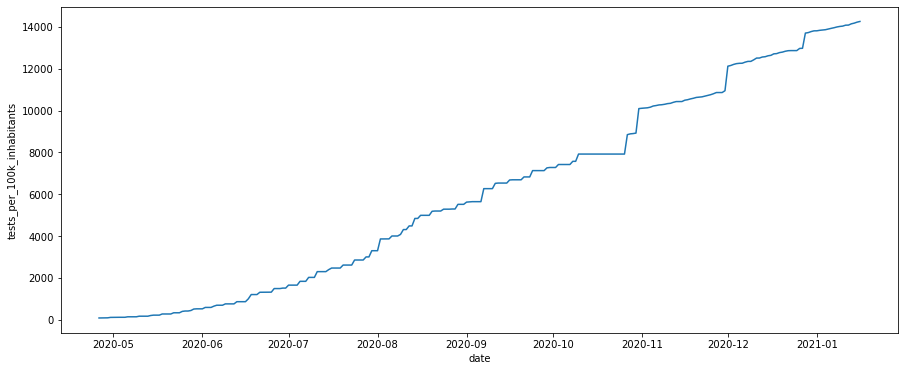

In [323]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df_woca[['date','state','tests_per_100k_inhabitants']].query('state == "TOTAL"'), x='date',y='tests_per_100k_inhabitants')

<AxesSubplot:xlabel='date', ylabel='tests_per_100k_inhabitants'>

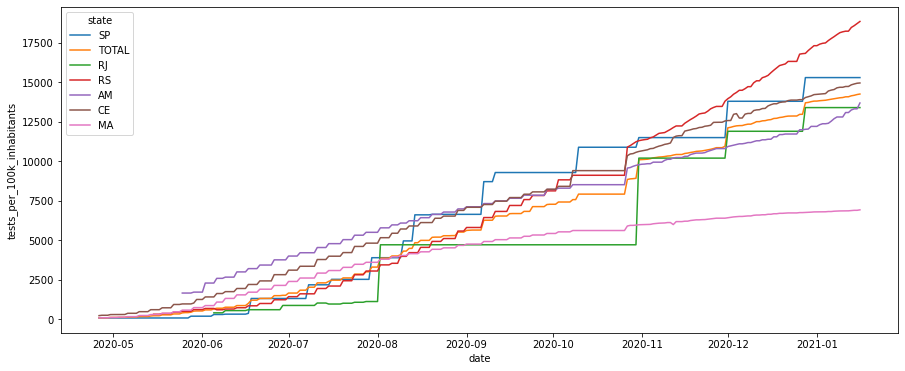

In [324]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df_woca[['date','state','tests_per_100k_inhabitants']].query('state in ["TOTAL", "SP", "RS", "RJ", "AM", "MA", "CE"]'), x='date',y='tests_per_100k_inhabitants', hue='state')

In [325]:
xvar = 'date'
yvar = 'tests_per_100k_inhabitants'#'tests_per_100k_inhabitants'

traces = [get_plotly_lineplot_trace_object( *get_xy_data_from_state_df(get_state_tests_df(df_woca, state_str, xvar=xvar, yvar=yvar)), name=state_str) for state_str in ["TOTAL", "SP", "RS", "RJ", "AM", "MA", "CE","RN"]]
data = [*traces]

layout = go.Layout(title='COVID-BR',
                  xaxis={'title':'Data'},
                  yaxis=dict(title='Testes por 100k Hab'),
                  hovermode='closest')

fig = go.Figure(data=data, layout=layout)

pyo.plot(fig, filename='tests_per_100k_inhabitants.html')

'tests_per_100k_inhabitants.html'

In [326]:
xvar = 'date'
yvar = 'deaths_per_100k_inhabitants'#'tests_per_100k_inhabitants'

traces = [get_plotly_lineplot_trace_object( *get_xy_data_from_state_df(get_state_tests_df(df_woca, state_str, xvar=xvar, yvar=yvar)), name=state_str) for state_str in ["TOTAL", "SP", "RS", "RJ", "AM", "MA", "CE","RN"]]
data = [*traces]

layout = go.Layout(title='COVID-BR',
                  xaxis={'title':'Data'},
                  yaxis=dict(title='deaths_per_100k_inhabitants'),
                  hovermode='closest')

fig = go.Figure(data=data, layout=layout)

pyo.plot(fig, filename='deaths_per_100k_inhabitants.html')

'deaths_per_100k_inhabitants.html'

In [327]:
xvar = 'date'
yvar = 'deaths_by_totalCases'#'tests_per_100k_inhabitants'

traces = [get_plotly_lineplot_trace_object( *get_xy_data_from_state_df(get_state_tests_df(df_woca, state_str, xvar=xvar, yvar=yvar)), name=state_str) for state_str in ["TOTAL", "SP", "RS", "RJ", "AM", "MA", "CE","RN"]]
data = [*traces]

layout = go.Layout(title='COVID-BR',
                  xaxis={'title':'Data'},
                  yaxis=dict(title='deaths_by_totalCases'),
                  hovermode='closest')

fig = go.Figure(data=data, layout=layout)

pyo.plot(fig, filename='deaths_by_totalCases.html')

'deaths_by_totalCases.html'

In [328]:
xvar = 'date'
yvar = 'newDeaths'#'tests_per_100k_inhabitants'

traces = [get_plotly_lineplot_trace_object( *get_xy_data_from_state_df(get_state_tests_df(df_woca, state_str, xvar=xvar, yvar=yvar)), name=state_str) for state_str in ["TOTAL", "SP", "RS", "RJ", "AM", "MA", "CE","RN"]]
data = [*traces]

layout = go.Layout(title='COVID-BR',
                  xaxis={'title':'Data'},
                  yaxis=dict(title='newDeaths'),
                  hovermode='closest')

fig = go.Figure(data=data, layout=layout)

pyo.plot(fig, filename='newDeaths.html')

'newDeaths.html'

In [329]:

xvar = 'date'
yvar = 'newDeaths_100k'#'tests_per_100k_inhabitants'

traces = [get_plotly_lineplot_trace_object( *get_xy_data_from_state_df(get_state_tests_df(df_woca, state_str, xvar=xvar, yvar=yvar)), name=state_str) for state_str in ["TOTAL", "SP", "RS", "RJ", "AM", "MA", "CE","RN"]]
data = [*traces]

layout = go.Layout(title='COVID-BR',
                  xaxis={'title':'Data'},
                  yaxis=dict(title='newDeaths_100k'),
                  hovermode='closest')

fig = go.Figure(data=data, layout=layout)

pyo.plot(fig, filename='newDeaths_100k.html')

'newDeaths_100k.html'

<AxesSubplot:xlabel='date', ylabel='newCases'>

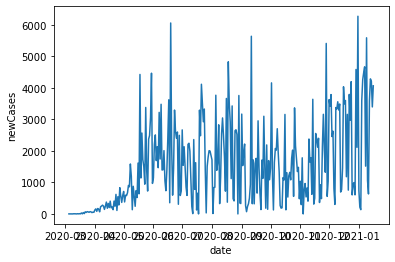

In [330]:
sns.lineplot(data = df_woca.query('state == "RJ"'),x='date' ,y='newCases')

count    2.750000e+02
mean    -5.233923e+15
std      8.679479e+16
min     -1.439329e+18
25%      6.015711e+00
50%      7.014790e+00
75%      9.265702e+00
max      9.089029e+02
dtype: float64
dias de infecção (media): mean of inv -5233922617938311.0 vs inv of mean 7.7002801918935075 
coef medio de transmissão: 0.14698618009520553 
r0 medio : mean over mean 1.131834771069203 mean from dist -194515826962070.6


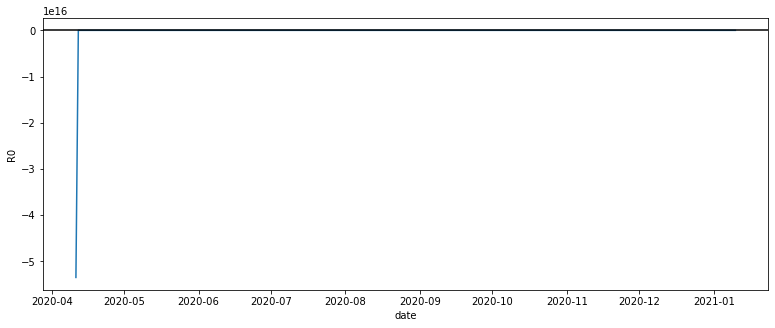

In [453]:
df_woca['N'] = df_woca['pop']

df_woca['R'] = df_woca['recovered']
df_woca['I'] = df_woca['totalCases']-df_woca['R']
df_woca['S'] = df_woca['pop']-df_woca['I']-df_woca['R']

# df_temp = df_woca.melt(id_vars=['date','state'],value_vars=['S','I','R'])
# sns.lineplot(data =df_temp.query('state == "TOTAL"'),x='date' ,y='value', hue='variable')

estado = 'RS'
df_temp = df_woca.set_index('date').sort_index().query(f'state=="{estado}"')[['pop','N','S','I','R','testes_caso_confirmado']]

df_temp['R_diff'] = df_temp['R'].diff(1)
df_temp['I_diff'] = df_temp['I'].diff(1)
df_temp['S_diff'] = df_temp['S'].diff(1)

# rolling mean
# df_temp = df_temp.rolling(window=14, center=True, win_type='gaussian').mean(std=10) #.dropna()
df_temp = df_temp.rolling(window=14, center=True, win_type='blackman').mean() #.dropna()
# df_temp = df_temp.rolling(window=15, center=True).mean()


# df_temp = df_temp[df_temp['S'].diff(1)<0]
# df_woca.set_index('date').sort_index().query('state == "TOTAL" ')

# df_temp = df_temp.loc['2020-11-15':'2021-01-18']

gamma = df_temp['R_diff']/df_temp['I']
beta  = -df_temp['S_diff']/(df_temp['S']*df_temp['I']/df_temp['pop'])
R0    = (beta/gamma)

df_temp['gamma'] = R0
df_temp['beta'] = R0
df_temp['R0'] = R0

df_temp = df_temp.dropna()

gamma = gamma.replace([np.inf, -np.inf], np.nan).dropna()
Tinfec = (1/gamma).replace([np.inf, -np.inf], np.nan).dropna()
beta  = beta.replace([np.inf, -np.inf], np.nan).dropna()
R0_clean = R0.replace([np.inf, -np.inf], np.nan).dropna()

gamma_medio = gamma.mean()
Tinfec_medio = Tinfec.mean()
beta_medio = beta.mean()
R0_medio = R0_clean.mean()

print(Tinfec.describe())
print(f'dias de infecção (media): mean of inv {Tinfec.mean()} vs inv of mean {1/gamma_medio} ')
print(f'coef medio de transmissão: {beta_medio} ')
print(f'r0 medio : mean over mean {beta_medio/gamma_medio} mean from dist {R0_medio}')

# sns.histplot(data=R0)
f, a = plt.subplots(1,1, figsize=(13,5))
sns.lineplot(data=df_temp,x=df_temp.index, y='R0', axes=a)
a.axhline(y=1,color='k')


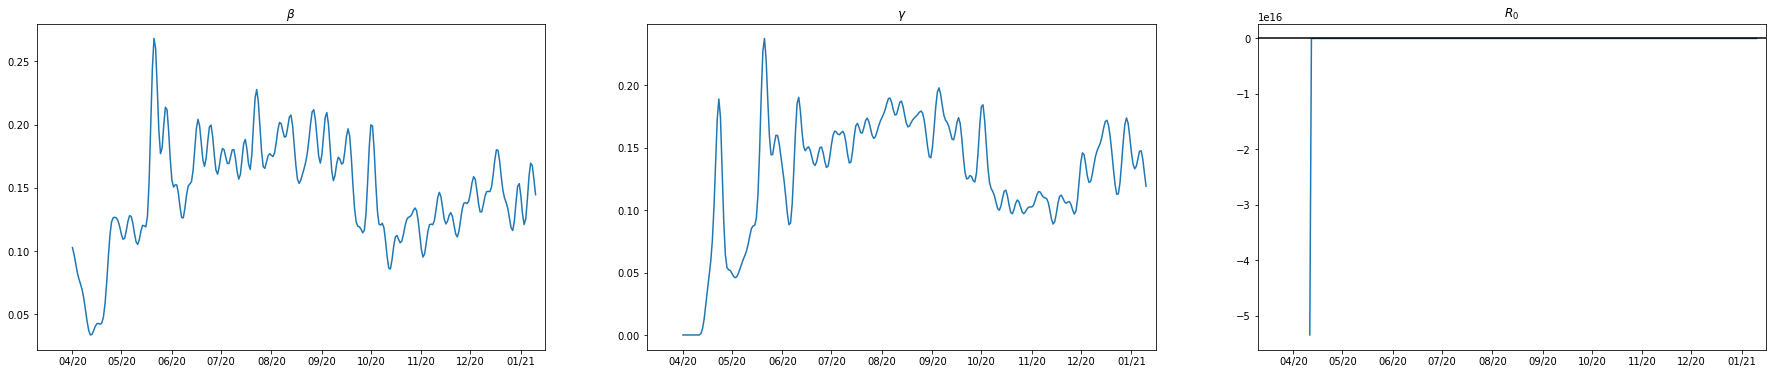

In [454]:
from matplotlib.dates import HourLocator, DateFormatter

f, a = plt.subplots(1,3, figsize=(31,6))

a[0].plot(beta), a[0].set_title(r"$ \beta $")
a[1].plot(gamma), a[1].set_title(r"$ \gamma $")
a[2].plot(R0), a[2].set_title(r"$ R_0 $")
a[2].axhline(y=1,color='k')


for i in range(len(a)):
    a[i].set_xlim([df_temp.index.min(),df_temp.index.max()])
    # a[i].set_xlim(['2020-09',df_temp.index.max()])
    a[i].xaxis.set_major_formatter(DateFormatter('%m/%y'))

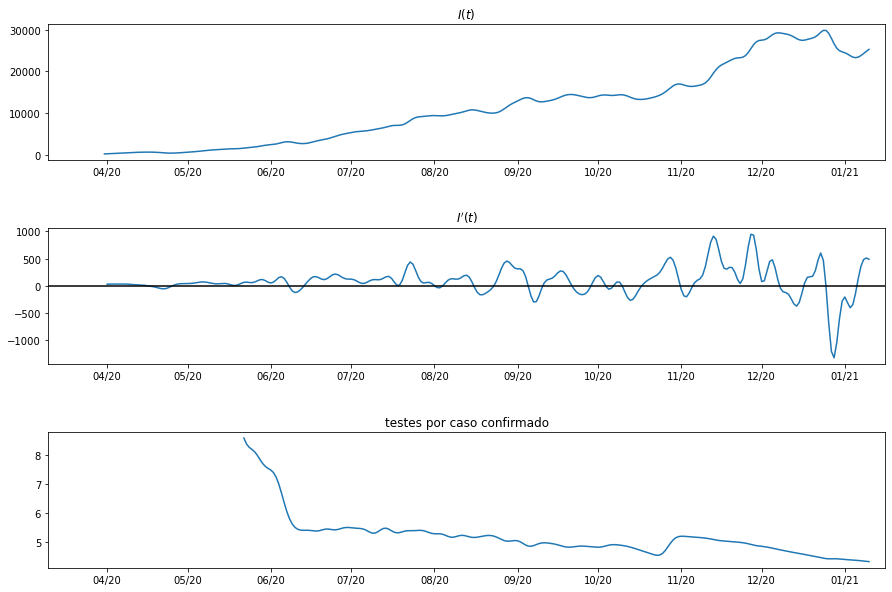

In [455]:
f, a = plt.subplots(3,1 , figsize=(15,10), gridspec_kw={'hspace':.5})

a[0].plot(df_temp['I']), 
a[0].set_title(r"$ I (t) $")

a[1].plot(df_temp['I_diff']), 
a[1].set_title(r"$ I^\prime (t) $")
a[1].axhline(y=0,color='k')

a[2].plot(df_temp['testes_caso_confirmado'])
a[2].set_title(r"testes por caso confirmado")

for i in range(len(a)):
    a[i].set_xlim([df_temp.index.min(),df_temp.index.max()])
    a[i].xaxis.set_major_formatter(DateFormatter('%m/%y'))
# a[0].plot(df_temp['S_diff']), a[0].set_title(r"$ S^\prime(t) $")
# a[0].plot(df_temp['S_diff']), a[0].set_title(r"$ S^\prime(t) $")

# a[1].plot(df_temp['I_diff']), a[1].set_title(r"$ I^\prime (t) $")
# a[2].plot(df_temp['R_diff']), a[2].set_title(r"$ R^\prime(t) $")